In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [12]:
path = "./winequality-white.csv"
df = pd.read_csv(path , header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
print(df.info())
print("\n========= First instances ========= \n")
print(df.head(5))
print(f'Nombre intance {len(df)}')
print(f'Nombre de caractéristiques {len(df.columns)}')



========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

========= First instances ========= 

   fixed acidity  volatile acidity  citric 

In [27]:
X = df.drop("quality", axis =1) 
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.unique())
print("\n========= Number of instance per qualities ========= \n")
df.groupby('quality')['pH'].count()


========= Wine Qualities ========= 

[6 5 7 8 4 3 9]

========= Number of instance per qualities ========= 



quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: pH, dtype: int64

# Question 3

/tmp/ipykernel_30067/200243729.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels (),rotation =90)


<Axes: >

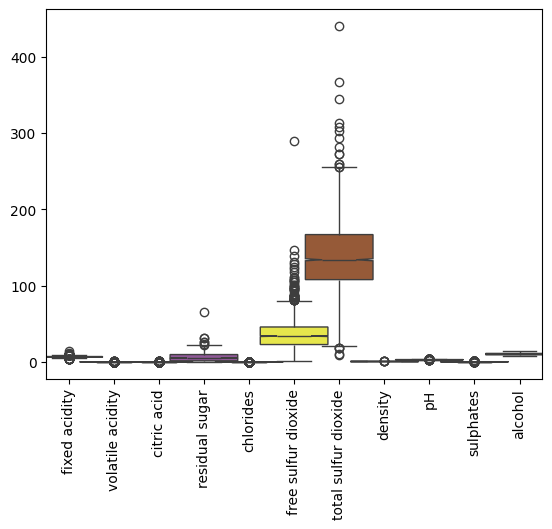

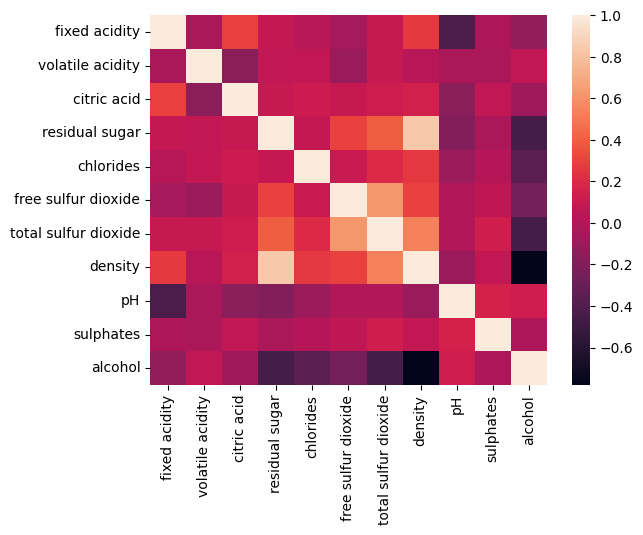

In [15]:
plt.figure ()
sb.boxplot(data=X,orient="v",palette="Set1",width =1.5, notch=True)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels (),rotation =90)
plt.figure ()
corr = X.corr()
sb.heatmap(corr)

In [28]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


## On voit que la varible 'total sulfur dioxide' a la plus grande variance et la plus grande moyenne .On voit aussi des valeurs extremes sur cette variable.
## Les autres variables ont des variances plutot faible
## Certaines caracteristiques sont plutot corrélées entre elles commme parexemple residar sugar et density

# 2 Classification

# 2.1)  Préparation des données

###  Transformation du probleme en une classification binaire

In [29]:
s=[0 if i<5 else 1 for i in Y]
Y=s

In [30]:
data_train,X_Test,label_train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,Y_train,Y_valid=train_test_split(data_train,label_train,test_size=0.2,random_state=42)

## Plus Proches Voisins

### 1. Testez cette méthode avec k = 3 et évaluez la performance sur Dv en calculant le taux d’erreur :

In [103]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,Y_train)
y_predi=clf.predict(X_valid)
taux_errer=sum([1 for i in range(len(y_predi)) if Y_valid[i]!=y_predi[i]])/len(X_valid)
print(f"\n========= Taux d'erreur {taux_errer}========= \n")


========= Taux d'erreur 0.039540816326530615========= 



 on a un faible taux d'erreur de 0.03 cela veut dire que dans 96% des cas le model predit la bonne qualite

## 2. En suivant la même procédure, testez la méthode avec plusieurs autres valeurs de k ∈ N (dans l’intervalle [1, 40]).

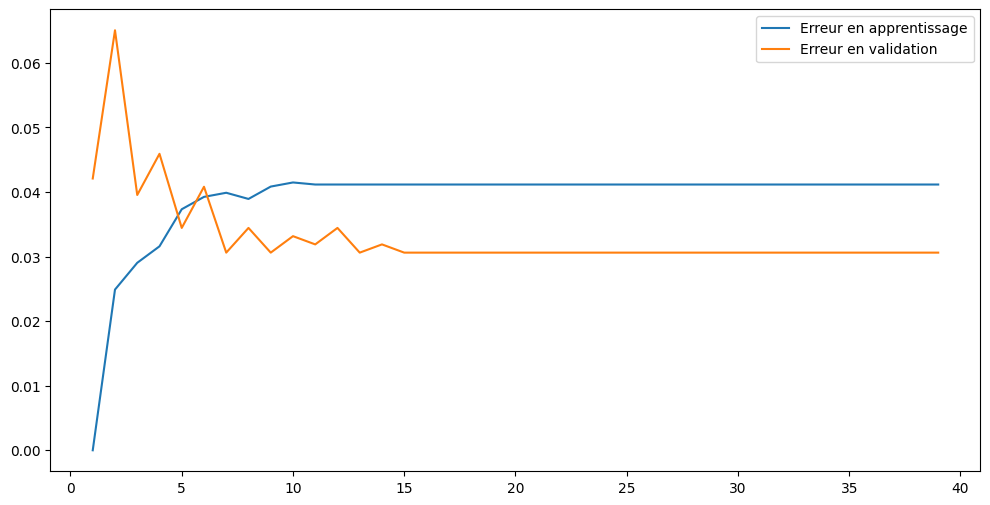

In [91]:
taux_erreur_train=[]
taux_erreur_validation=[]
for k in range(1,40):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,Y_train)
    y_predi_train=clf.predict(X_train)
    y_predi_val=clf.predict(X_valid)
    erreur_train=sum([1 for i in range(len(y_predi_train)) if Y_train[i]!=y_predi_train[i]])/len(Y_train)
    erreur_valid=sum([1 for i in range(len(y_predi_val)) if Y_valid[i]!=y_predi_val[i]])/len(Y_valid)
    taux_erreur_train.append(erreur_train)
    taux_erreur_validation.append(erreur_valid)
plt.figure(figsize=(12,6))
plt.plot([i for i in range(1,40)],taux_erreur_train,label='Erreur en apprentissage')
plt.plot([i for i in range(1,40)],taux_erreur_validation,label='Erreur en validation ')
plt.legend()
plt.show()

Le surapprentissage a été observé pour k=2 parceque on a vu que le taux d'erreur sur les données de validation prend son maximal (0.065) alors que le taux d'erreur sur les données de validation reste faible

Vu l'evolution des deux courbes on voit que la meiileur valeur de k est k=15 parcequ'on trouve le meilleur compromis entre l'erreur sur les données d'apprentissage et l'erreur sur les données de validation

# 4) Choisissez la meilleure valeur pour k et évaluer les performances de la méthode sur Dt

In [105]:
#Fusionne les données d'entrainement et de validation
data_train=pd.concat([X_train,X_valid])
data_labels=np.concat((np.array(Y_train),np.array(Y_valid)))
clf=KNeighborsClassifier(n_neighbors=15)
clf.fit(data_train,data_labels)
y_predi=clf.predict(X_Test)
taux_errer=sum([1 for i in range(len(X_Test)) if Y_Test[i]!=y_predi[i]])/len(X_Test)
print(f"\n========= Taux d'erreur {taux_errer}========= \n")


========= Taux d'erreur 0.02959183673469388========= 



On a un taux d'erreur de 0.029 qui correspond au taux d'erreur minimal  qu'on a observé sur la courbe qui represente le taux d'errer sur les données de validation donc ça confirme que la valeur de k qu'on a choisit une valeur optimal pour ce probleme

# 2.3 Normaliser ou non les données ?

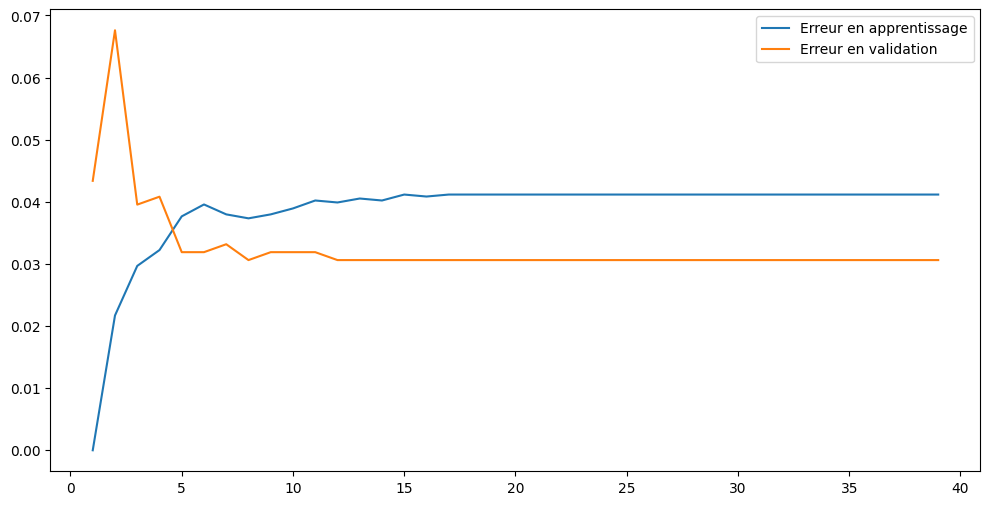

In [109]:
taux_erreur_train=[]
taux_erreur_validation=[]
sc = StandardScaler(with_mean=True , with_std=True)
sc = sc.fit(X_train)
Xa_n = sc.transform(X_train)
Xv_n = sc.transform(X_valid)
for k in range(1,40):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa_n,Y_train)
    y_predi_train=clf.predict(Xa_n)
    y_predi_val=clf.predict(Xv_n)
    erreur_train=sum([1 for i in range(len(y_predi_train)) if Y_train[i]!=y_predi_train[i]])/len(Y_train)
    erreur_valid=sum([1 for i in range(len(y_predi_val)) if Y_valid[i]!=y_predi_val[i]])/len(Y_valid)
    taux_erreur_train.append(erreur_train)
    taux_erreur_validation.append(erreur_valid)
plt.figure(figsize=(12,6))
plt.plot([i for i in range(1,40)],taux_erreur_train,label='Erreur en apprentissage')
plt.plot([i for i in range(1,40)],taux_erreur_validation,label='Erreur en validation ')
plt.legend()
plt.show()

Les resultats ont une legere difference parceque ici on voit qu'à partir de k=12  l'erreur sur les données de validation n'augmente plus de meme que l'erreur en sur les données d'apprentissage donc k=12 serait un bon compromi et une valeur optimal aussi pour ce probleme.
Pour la suit on choisit k=12

## Sur Dt

In [119]:
#Fusionne les données d'entrainement et de validation
data_train=pd.concat([X_train,X_valid])
X_n=sc.transform(data_train)
data_labels=np.concat((np.array(Y_train),np.array(Y_valid)))
clf=KNeighborsClassifier(n_neighbors=12)
clf.fit(data_train,data_labels)
Xt_n=sc.transform(X_Test)
y_predi=clf.predict(Xt_n)
taux_errer=sum([1 for i in range(len(X_Test)) if Y_Test[i]!=y_predi[i]])/len(Y_Test)
print(f"\n========= Taux d'erreur {taux_errer}========= \n")


========= Taux d'erreur 0.030612244897959183========= 



Le taux d'errer a legerement augmenté par rapport aux données sans normalisation donc la normalisation n'a pas augmenté la capacité de généralisation du model sur ce probleme meme que y'a des variables qui ont une ordre de grandeur plus importante que d'autres